In [1]:
import lime
import sklearn
import numpy as np
import sklearn.datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import random
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/navid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **20 Newsgroups Dataset**

---

The `20 Newsgroups` dataset is a collection of approximately `20,000` newsgroup documents, partitioned across `20` different newsgroups. The dataset is widely used for text classification and clustering tasks in machine learning and natural language processing.

#### **Key Features:**

- **Diverse Topics**: The 20 newsgroups are organized into categories that cover a range of topics, including religion, sports, hardware, graphics, and more.
- **Headers & Footers**: Many of the documents include headers, footers, and quotes, which can be removed for some experiments to increase the difficulty of the classification task.
- **Source**: Originally collected from the Usenet newsgroups in the late 1990s.

#### **Common Use Cases:**

- **Text Classification**: Assigning documents to one of the 20 newsgroup categories.
- **Feature Extraction**: Converting text data into numerical form (e.g., TF-IDF) for machine learning.
- **Topic Modeling**: Identifying topics and patterns within the documents.

In [2]:
# Load the 20 newsgroups dataset
newsgroups_train = sklearn.datasets.fetch_20newsgroups(subset='train')
newsgroups_test = sklearn.datasets.fetch_20newsgroups(subset='test')

In [3]:
print(newsgroups_test.data[0])

From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler



### **TfidfVectorizer**

---

The `TfidfVectorizer` is a feature extraction method provided by the `scikit-learn` library, used to transform text data into numerical format suitable for machine learning algorithms.

#### **Key Components:**

- **TF (Term Frequency)**: Represents the frequency of a word in a document.
- **IDF (Inverse Document Frequency)**: Diminishes the weight of terms that occur frequently in the dataset and increases the weight of terms that occur rarely.

#### **Features:**

- **Tokenization**: Splits the text into individual tokens (usually words).
- **Lowercasing**: Converts all characters in the text to lowercase.
- **Stopwords Removal**: Filters out common words like 'and', 'the', etc. (optional).
- **Regular Expressions**: Uses regex to identify and extract patterns from text.
- **Output**: Produces a sparse matrix indicating the TF-IDF scores of words in each document.

In [4]:
# Create a TF-IDF Vectorizer
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=list(stop_words), lowercase=False)

### Random Forest

The RandomForestClassifier is a supervised machine learning algorithm provided by the scikit-learn library. It is an ensemble learning method that constructs a "forest" of decision trees during training and outputs the class that is the mode of the classes (classification) of the individual trees for prediction.

In [5]:
# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
pipeline = make_pipeline(vectorizer, classifier)
pipeline.fit(newsgroups_train.data, newsgroups_train.target)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(lowercase=False,
                                 stop_words=['doesn', 'they', "wasn't", 'than',
                                             'does', "he's", "i'll", 'other',
                                             's', "it's", 'under', 'hers',
                                             'with', 'only', "they've", 'nor',
                                             'aren', 'on', "you've", 'ma',
                                             'such', "they'll", 'before',
                                             'needn', "i've", 'not', 'into',
                                             "hadn't", "they're", 'again', ...])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [6]:
# Evaluate the model on the test data
test_predictions = pipeline.predict(newsgroups_test.data)
accuracy = accuracy_score(newsgroups_test.target, test_predictions)
print("Accuracy:", accuracy)
print(
    "\nClassification Report:\n",
    classification_report(newsgroups_test.target,
                          test_predictions,
                          target_names=newsgroups_test.target_names))

Accuracy: 0.7765533722782794

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.74      0.63      0.68       319
           comp.graphics       0.60      0.72      0.66       389
 comp.os.ms-windows.misc       0.67      0.77      0.72       394
comp.sys.ibm.pc.hardware       0.66      0.66      0.66       392
   comp.sys.mac.hardware       0.76      0.77      0.76       385
          comp.windows.x       0.80      0.72      0.75       395
            misc.forsale       0.73      0.91      0.81       390
               rec.autos       0.87      0.80      0.83       396
         rec.motorcycles       0.90      0.92      0.91       398
      rec.sport.baseball       0.81      0.91      0.86       397
        rec.sport.hockey       0.87      0.92      0.90       399
               sci.crypt       0.89      0.91      0.90       396
         sci.electronics       0.70      0.54      0.61       393
                 sci.

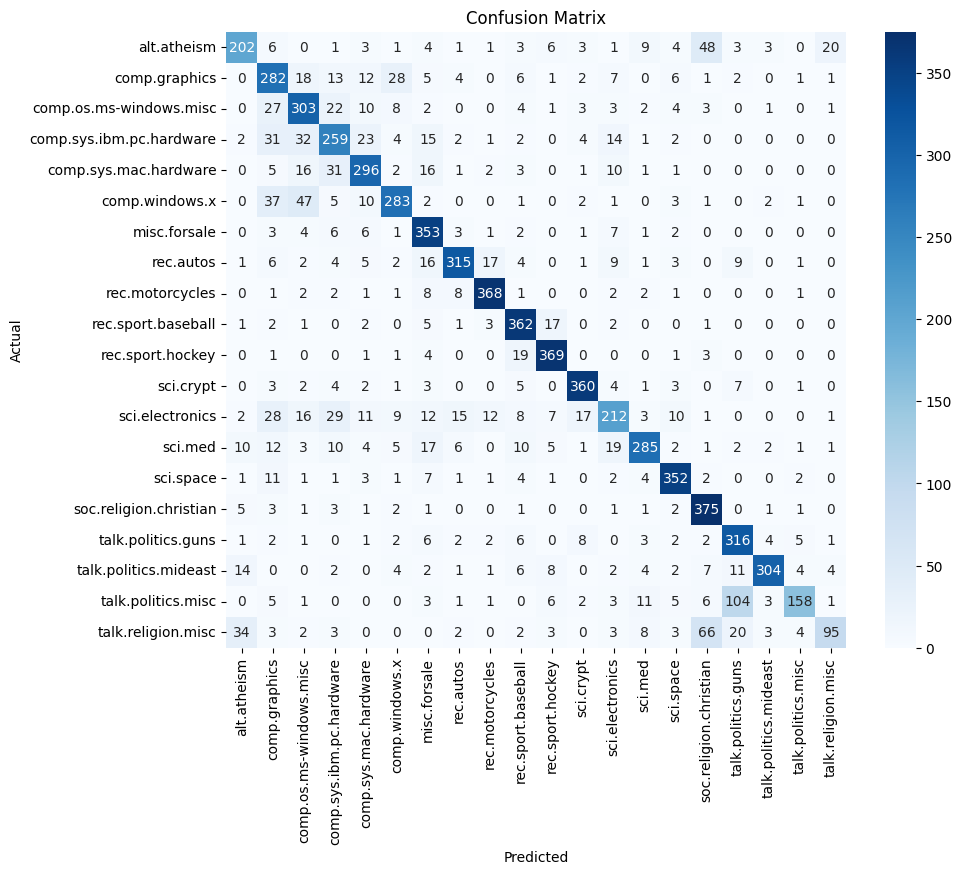

In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(newsgroups_test.target, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=newsgroups_test.target_names,
            yticklabels=newsgroups_test.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# Make a prediction on a test example
idx = 22
test_instance = newsgroups_test.data[idx]

#print('\nOriginal Text:\n', test_instance, '-'*40)
print('True Label:', newsgroups_test.target_names[newsgroups_test.target[idx]])

pred_prob = pipeline.predict_proba([test_instance])
predicted_label = pipeline.predict([test_instance])[0]
print('Predicted Label:', newsgroups_test.target_names[predicted_label])
print('Prediction Probability:', pred_prob[0, predicted_label])

True Label: talk.politics.mideast
Predicted Label: alt.atheism
Prediction Probability: 0.24


In [9]:
print(test_instance)

From: josip@eng.umd.edu (Josip Loncaric)
Subject: Re: Europe vs. Muslim Bosnians
Organization: Project GLUE, University of Maryland, College Park
Lines: 79
NNTP-Posting-Host: orbit.src.umd.edu

In article <13MAY93.02285380@edison.usask.ca> f54oguocha@edison.usask.ca writes:
>
>please, don't be offended at this question: Who are the "Muslims" in the
>Bosnian context? 

Bosnian Muslims are citizens od Bosnia-Herzegovina who identify themselves
with Bosnian Muslim cultural and religious tradition.

>i know that a moslem/muslim is a believer in Islam. Islam 
>is a religion and it is practised in many parts of the world. But it is not
>, yes definitely not, an ethinic group. ok! so, these Bosnian Muslims, who
>are they? to which ethnic group do they belong? what language(s) do they
>speak? do they have a different language from that of the Serbs or Croats? 

In Bosnia, "Muslim" is not merely a religious category, but an ethnic
one as well.  Actually, here are the two contradictory arguments

In [10]:
for i, item in enumerate(newsgroups_test.target_names):
    print(f'{i} - {item}') 

0 - alt.atheism
1 - comp.graphics
2 - comp.os.ms-windows.misc
3 - comp.sys.ibm.pc.hardware
4 - comp.sys.mac.hardware
5 - comp.windows.x
6 - misc.forsale
7 - rec.autos
8 - rec.motorcycles
9 - rec.sport.baseball
10 - rec.sport.hockey
11 - sci.crypt
12 - sci.electronics
13 - sci.med
14 - sci.space
15 - soc.religion.christian
16 - talk.politics.guns
17 - talk.politics.mideast
18 - talk.politics.misc
19 - talk.religion.misc


In [11]:
# Create a LIME Text Explainer
explainer = LimeTextExplainer(class_names=newsgroups_test.target_names,
                              random_state=42)

# Explain the prediction
exp = explainer.explain_instance(
    test_instance, pipeline.predict_proba, num_features=15,
    labels=[0, 17])  # Adding labeles is necessary for multi-class cases
exp.show_in_notebook(text=True)

# Understanding Kernel Width in LIME

The `kernel_width` is a pivotal hyperparameter in LIME, playing a vital role in defining the size of the neighborhood around the instance that is being interpreted. This size directly influences how LIME generates perturbed samples and weighs them during the generation of explanations.

## What is Kernel Width?

In LIME, a kernel function is employed to assign weights to the perturbed samples based on their distance to the original instance. The `kernel_width` parameter controls the width of this kernel function, determining the scale of the neighborhood around the instance.

### Smaller Kernel Width:

- **Description**: A smaller `kernel_width` results in a narrower kernel. This means that only perturbed samples very close to the original instance will receive significant weights during the explanation generation.
- **Pros**: 
  - Focuses on the immediate vicinity of the instance, providing a more local explanation.
- **Cons**: 
  - Samples slightly farther away will have rapidly diminished influence, potentially leading to sensitivity and less stability in the explanations.

### Larger Kernel Width:

- **Description**: A larger `kernel_width` results in a wider kernel, allowing perturbed samples that are farther away from the instance to have a more substantial influence on the explanation.
- **Pros**: 
  - Provides a more global view, potentially capturing more general trends in the model’s behavior.
- **Cons**: 
  - Can dilute the influence of the most relevant features, possibly making the explanation less precise.

Understanding and choosing an appropriate `kernel_width` is crucial as it directly impacts the balance between locality and globality in the explanations provided by LIME, thereby affecting their interpretability and usefulness.


In [12]:
explainer = LimeTextExplainer(class_names=newsgroups_test.target_names,
                              kernel_width=10,
                              random_state=42)

# Explain the prediction
exp = explainer.explain_instance(
    test_instance, pipeline.predict_proba, num_features=15,
    labels=[0, 17])  # Adding labeles is necessary for multi-class cases

# Save the explanation to a file
exp.save_to_file('lime_explanation.html')

exp.show_in_notebook(text=True)